# Investigación de comportamiento de usuarios en la aplicación de venta de alimentos

## Introducción

A continuación se debe debe investigar el comportamiento del usuario para la aplicación de la empresa que vende productos alimenticios.

El estudio debe analisar el embudo de eventos de la aplicación. Para ello se van a utilizar dos grupos de control que se van a denominar 246 y 247 y un grupo experimental denominado 248.

Se deben realizar test estadisticos A/A y A/B por cada uno de los eventos y determinar si hay diferencias significativas entre los grupos.

## Contenido
Introducción

1 Inicio

    1.1 Carga de 
    1.2 Carga de dataset
    1.3 Lectura y explorsción de dataset
    1.4 Preprocesamiento de datos

2 Estudiar y comprobar los datos 

    2.1 Cuantos eventos hay en los registros?
    2.2 Cuantos usuarios hay en los registros?
    2.3 Cual es el promedio de eventos por usuarios?
    2.4 Qué periodo de eventos cubren los datos?
    2.5 Confirmación de los usuarios en los tres grupos experimentales

3 Estudio del embudo de eventos

    3.1 Qué eventos hay en los registros y su frecuencia
    3.2 Que cantidad de usuarios realizaron estas acciones
    3.3 Orden de ocurrecia de eventos
    3.4 Trazar el gráfico de embudo
    3.5 En que etapa se puerden más usuarios?
    3.6 Qué porcentaje de usuarios hace todo el viaje?
    3.7 Gráfico de embudo

4 Estudio de resultados del experimento

    4.1 Cuantos usuarios hay en cada grupo?
    4.2 Observar si hay diferencia significativa entre los grupos 246 y 247
    4.3 Seleccionar el evento más popular
    4.4 Comprobar si hay diferencias significativas para todos los eventos

        4.4.1 Entre grupos de control
        4.4.2 Entre cada grupo de control y el grupo de experimento

    4.5 Nivel de significancia establecido y corregido

Conclusiones

### 1 Inicio

#### 1.1 Carga de librerias

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import math as mth

#### 1.2 Carga de dataset

In [53]:
try:
    data_logs=pd.read_csv('C:/Users/Yessica/Documents/Raul/Practicum/Proyecto_integrado_2/logs_exp_us.csv', sep='\t')
except:
    data_logs=pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

#### 1.3 Lectura y exploración de archivo

In [54]:
data_logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [55]:
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


#### 1.4 Preprocesamiento de datos

In [56]:
#Buscando valores null
data_logs.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Coincide con los datos arrojados en el .info realizado en el paso anterior

In [57]:
#Renombrar las columnas
data_logs=data_logs.rename(mapper={'EventName':'event_name',
                                   'DeviceIDHash':'user_id',
                                   'EventTimestamp':'timestamp',
                                   'ExpId':'experiment_group'}, axis=1)
data_logs.head()

,event_name,user_id,timestamp,experiment_group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [58]:
#Cambiar los tipos de datos en la columna timestamp
data_logs['timestamp']=pd.to_datetime(data_logs['timestamp'], unit='s')
data_logs.head()

,event_name,user_id,timestamp,experiment_group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [59]:
#Agregando la columna fecha al dataset
data_logs['date']=data_logs['timestamp'].values.astype(dtype='datetime64[D]')
data_logs.head(50)

,event_name,user_id,timestamp,experiment_group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
5,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248,2019-07-25
6,OffersScreenAppear,8351860793733343758,2019-07-25 14:50:42,246,2019-07-25
7,MainScreenAppear,5682100281902512875,2019-07-25 20:14:37,246,2019-07-25
8,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247,2019-07-25
9,MainScreenAppear,5407636962369102641,2019-07-26 03:35:12,246,2019-07-26


In [60]:
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_name        244126 non-null  object        
 1   user_id           244126 non-null  int64         
 2   timestamp         244126 non-null  datetime64[ns]
 3   experiment_group  244126 non-null  int64         
 4   date              244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [61]:
#Buscando duplicados
data_logs.duplicated().sum()

413

In [62]:
data_logs.duplicated().value_counts()

False    243713
True        413
dtype: int64

Por el momento no se van a eliminar los duplicados porque pueden ser eventos iguales en fechas diferentes, en el transcurso del proyecto se tomará la desición dejarlos o eliminarlos

### 2 Estudiar y comprobar los datos

#### 2.1 ¿Cuántos eventos hay en los registros?

In [63]:
data_logs.groupby('event_name')['user_id'].count()

event_name
CartScreenAppear            42731
MainScreenAppear           119205
OffersScreenAppear          46825
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: user_id, dtype: int64

#### 2.2 ¿Cuántos usuarios hay en los registros?

In [64]:
print(f'Hay {data_logs["user_id"].nunique()} usuarios unicos')

Hay 7551 usuarios unicos


#### 2.3 ¿Cuál es el promedio de eventos por usuario?

In [65]:
print(f'Hay {round(len(data_logs)/data_logs["user_id"].nunique(), 3)} eventos por usuario')

Hay 32.33 eventos por usuario


#### 2.4 ¿Qué periodo de tiempo cubren los datos?

In [66]:
print(f'fecha mínima: {data_logs["date"].min()}')

fecha mínima: 2019-07-25 00:00:00


In [67]:
print(f'fecha máxima: {data_logs["date"].max()}')

fecha máxima: 2019-08-07 00:00:00


Hay un rango de 13 días entre el 25-07-2019 y 07-08-2019

/tmp/ipykernel_124/2299816406.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



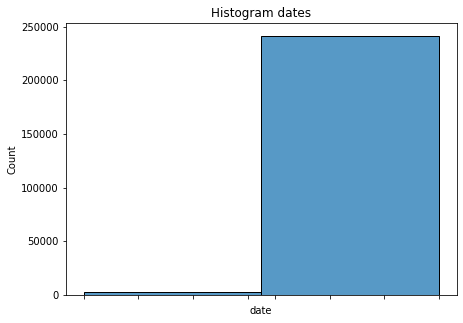

In [68]:
#Histograma de fechas y horas
f,ax=plt.subplots(figsize=(7,5))
ax=sns.histplot(data_logs, x='date', bins=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Histogram dates')
plt.show()

El histograma muestra que hay datos para todas las fechas dentro del rango que contiene el dataset, para las fechas del 25-07 al 31-07 hay muy pocos datos. A partir de esta última fecha hay un gran aumento de actividad en la aplicación.

Basado en el histograma se filtraran los datos a partir de la fecha del punto de quiebre que es a patir del 01-08-2019.

In [69]:
filtered_data=data_logs.loc[data_logs['date']>'2019-07-31']
filtered_data.head()

,event_name,user_id,timestamp,experiment_group,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


El dataset filtrado contiene los tres grupos de experimento

In [70]:
#Comparación del numero de usarios perdidos entre el dataset original y el dataset filtrado
print(data_logs['user_id'].count())
print(filtered_data['user_id'].count())

244126
241298


In [71]:
# Calculando cuanto usuarios se quedan y cuantos se pierden al filtrar el dataset
print(f"% Usuarios que permanecen: {100*round(filtered_data['user_id'].nunique()/data_logs['user_id'].nunique(), 3)}")
print(f"% Usuarios eliminados:{100*round(1-(filtered_data['user_id'].nunique()/data_logs['user_id'].nunique()), 3)}")

% Usuarios que permanecen: 99.8
% Usuarios eliminados:0.2


#### 2.5 Confirmación de usuarios en los tres grupos experimentales.

In [72]:
filtered_data.groupby('experiment_group')['user_id'].nunique()

experiment_group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

### 3 Estudiar el embudo de eventos

#### 3.1 Observar qué eventos hay en los registros y su frecuencia de suceso. Ordenados por frecuencia.

In [73]:
#Cantidad de usuarios que realizaron cada acción
filtered_data.groupby('event_name')['user_id'].count().sort_values(ascending=False)

event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: user_id, dtype: int64

#### 3.2 Encontrar la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [74]:
#Cantidad de usuarios que realizaron cada acción en cada uno de los grupos
users_246=filtered_data.pivot_table(index='event_name', columns='experiment_group', 
                          values='user_id', aggfunc='nunique').sort_values(by=246, ascending=False) 
users_246

experiment_group,246,247,248
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


#### 3.3 Orden en que ocurren los eventos 

main screen, offer screen, cart screen, payment screen. Tutorial no es parte de la secuencia ya que puede o no pasar por ese paso y no afecta el orden de los pasos para lograr hacer una compra.

#### 3.4 Trazar el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. 

In [75]:
proportion_by_event=(filtered_data
     .pivot_table(index='event_name', 
                  columns='experiment_group',
                  values='user_id', 
                  aggfunc='nunique')
     .sort_values(by=246, ascending=False)
     .transform(lambda x: x / x.iloc[0]))
proportion_by_event

experiment_group,246,247,248
event_name,,,
MainScreenAppear,1.000000,1.000000,1.000000
OffersScreenAppear,0.629388,0.613893,0.614120
CartScreenAppear,0.516735,0.500000,0.493381
PaymentScreenSuccessful,0.489796,0.467690,0.473726
Tutorial,0.113469,0.114297,0.111913


In [76]:
#data / data.loc['MainScreenAppear']

#### 3.5 ¿En qué etapa pierdes más usuarios?

En la tabla anterior se puede observar que en la etapa de main screen a offer screen se pierden cerca del 38% de los usuarios, entre la offer screen y cart screen un 11% y entre cart screen y payment screen un 3%. Por lo que entre main screen y offer screen es la etapa en que más se pierden usuarios.

#### 3.6 ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [77]:
users_246.loc['PaymentScreenSuccessful']/users_246.loc['MainScreenAppear']

experiment_group
246    0.489796
247    0.467690
248    0.473726
dtype: float64

Se observa que entre el 46% y el 48% de los usuarios hacen el recorrido completo

#### 3.7 Grafico de embudo

In [78]:
df = pd.DataFrame(dict(
    events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful',
             'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful',
            'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
    percentage = [100, 62.93, 51.67, 48.97,
                  100, 61.38, 50.00, 46.76,
                 100, 61.41, 49.33, 47.37],
    values = [2450, 1542, 1266, 1200,
            2476, 1520, 1238, 1158,
            2493, 1531, 1230, 1181],
    groups = ['246', '246', '246', '246',
                '247', '247', '247', '247',
            '248', '248', '248', '248']))

fig = px.funnel(df, x = 'percentage', y = 'events', text='values', color = 'groups')

fig.show()

### 4 Estudio de resultados del experimento


#### 4.1 ¿Cuántos usuarios hay en cada grupo?

In [79]:
#Cálculo de número de usuarios general en cada uno de los grupos
filtered_data['experiment_group'].value_counts()

248    84726
246    79425
247    77147
Name: experiment_group, dtype: int64

In [80]:
#Cálculo de número de usuarios unicos en cada uno de los grupos
filtered_data.groupby('experiment_group')['user_id'].nunique()

experiment_group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

El número de usuarios es muy parejo para los tres grupos, los grupos 246 y 247 son grupos de control, el grupo 248 es el grupo de prueba.

#### 4.2 Observar si hay una diferencia estadísticamente significativa entre los grupos de control 246 y 247

Hipótesis nula: No existe diferencia estadística entre los grupos

Hipótesis alternativa: Existe diferencia estadística entre los grupos 

In [81]:
prueba= (filtered_data
     .pivot_table(index='event_name',
                  columns='experiment_group',
                  values='user_id', aggfunc='nunique')
     .sort_values(by=246, ascending=False)
     .assign(_246_247=lambda x: x[246] + x[247])
     .drop(index='Tutorial'))  
prueba

experiment_group,246,247,248,_246_247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [82]:
#Comparando los grupos 246 y 247 en el evento OffersScreenAppear 
#establecemos el valor de alpha en 0.05
alpha=0.05

#Calculo de la proporción de exito en OffersScreenAppear
successes=np.array([1542,1520]) #El valor se toma de los resultados de la tabla anterior de los respectivos grupos
trials=np.array([6458,6392]) # Estos valores salen de la suma por evento de los usuarios de cada grupo, seria la población

#Cálculo de exito de los grupos

p_246= successes[0] / trials[0]

p_247= successes[1] / trials[1]

#Cálculo de proporción de exito unido

p_combined= (successes[0]+successes[1]) / (trials[0]+trials[1])

#Cálculo de la diferencia

difference= p_246 - p_247

#Cálculo de la desviación estatandar

z_value= difference / (mth.sqrt(p_combined*(1-p_combined)*((1/trials[0])+(1/trials[1]))))

#Establecer la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2


print('Resultado A/A para el evento OffersScreenAppear')

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado A/A para el evento OffersScreenAppear
p-value:  0.8966517949162409
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


El resultado de la prueba prueba de diferencia de proporciones arroja que no podemos rechazar la hipótesis nula de que entre los grupos no existe una diferencia estadistica, el p-value fue mayor al valor de alpha seleccionado.

#### 4.3 Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. 

In [83]:
proportion_by_event

experiment_group,246,247,248
event_name,,,
MainScreenAppear,1.000000,1.000000,1.000000
OffersScreenAppear,0.629388,0.613893,0.614120
CartScreenAppear,0.516735,0.500000,0.493381
PaymentScreenSuccessful,0.489796,0.467690,0.473726
Tutorial,0.113469,0.114297,0.111913


El evento más popular es MainScreenAppear con el 100% de los usuarios en los tres grupos.

Se puede observar que los grupos en promedio son muy similares, entre los dos grupos de control hay una leve diferencia, y entre los grupos 247 y 248 son más parecidos

#### 4.4 Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos

##### 4.4.1 Comparación entre los grupos de control 246 y 247

A continuación se creará la función para calcular si hay diferencias estadisticas entre los grupos con el resto de los eventos

In [84]:
def prueba_de_grupos2 (df,group1, group2, event_name ):
    #user_sum_group1=df[group1].sum()
    #user_sum_group2=df[group2].sum()

    trails=np.array([df.loc['MainScreenAppear'].loc[group1], df.loc['MainScreenAppear'].loc[group2]])
    successes=np.array([df.loc[event_name].loc[group1],df.loc[event_name].loc[group2]])


#Cálculo de exito de los grupos

    p1= successes[0] / trials[0]

    p2= successes[1] / trials[1]

#Cálculo de proporción de exito unido

    p_combined= (successes[0]+successes[1]) / (trials[0]+trials[1])

#Cálculo de la diferencia

    difference= p1 - p2

#Cálculo de la desviación estatandar

    z_value= difference / (mth.sqrt(p_combined*(1-p_combined)*((1/trials[0])+(1/trials[1]))))

#Establecer la distribución normal estándar (media 0, desviación estándar 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return p_value


In [85]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/A para los grupos: 246 y 247')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,246, 247, event )
    
    print(funcion, event)


    if (funcion < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/A para los grupos: 246 y 247
0.8966517949162409 OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.7359876852552283 CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.4957537491808677 PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


Como se puede observar el test para los grupos de control 246 y 247 con todos los eventos, el pvalue fue mayor a 0.05 por lo que no se puede rechazar la hipótesis nula planteada con anterioridad.

##### 4.4.2 Comparar los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

4.4.2.1 Comparación grupo 246 vs 248

In [86]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/B para los grupos: 246 y 248')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,246, 248, event )
    
    print(funcion, event)


    if (funcion < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/B para los grupos: 246 y 248
0.9211954497513615 OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.605234875519046 CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.8778219428556662 PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


Comparación grupo 247 y 248

In [87]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/B para los grupos: 247 y 248')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,247, 248, event )
    
    print(funcion, event)


    if (funcion < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/B para los grupos: 247 y 248
0.5803057566395278 OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.9165981464694233 CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.4234266510002511 PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


Comparación de grupos de control 246 y 247 vs 248

In [88]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/B para los grupos: 246_247 y 248')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,"_246_247", 248, event )
    
    print(funcion, event)


    if (funcion < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/B para los grupos: 246_247 y 248
0.0 OffersScreenAppear
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones
0.0 CartScreenAppear
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones
0.0 PaymentScreenSuccessful
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


Para los tres eventos el pvalue resulta mayor al 5% que es el valor de significancia, por lo tanto no se puede rechazar la hipótesis nula de que no hay diferencias significativas entre los grupos, despues de haber realizado el test de hipótesis.

##### 4.5 ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. ¿Cuál debería ser el nivel de significación?

In [89]:
#Se utilizó un nivel de significancia del 5% (0.05), se realizaron un total de 12 pruebas.
#Se aplicará la corrección de Bonferroni para encontrar el nivel de significancia corregida

alpha= 0.05
n_tests=12
bonferroni_alpha= alpha / n_tests
print(f'En alpha corregido segun Bonferroni es: {bonferroni_alpha}')


En alpha corregido segun Bonferroni es: 0.004166666666666667


Prueba para los grupos 246 y 247

In [90]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/A para los grupos: 246 y 247')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,246, 247, event )
    
    print(funcion, event)


    if (funcion < bonferroni_alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/A para los grupos: 246 y 247
0.8966517949162409 OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.7359876852552283 CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.4957537491808677 PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


Comparación de los grupos 246 y 248

In [91]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/B para los grupos: 246 y 248')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,246, 247, event )
    
    print(funcion, event)


    if (funcion < bonferroni_alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/B para los grupos: 246 y 248
0.8966517949162409 OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.7359876852552283 CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.4957537491808677 PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


Comparación de los grupos 247 y 248

In [92]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/B para los grupos: 247 y 248')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,247, 248, event )
    
    print(funcion, event)


    if (funcion < bonferroni_alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/B para los grupos: 247 y 248
0.5803057566395278 OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.9165981464694233 CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 
0.4234266510002511 PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones 


Comparación para los grupos de control 246 y 247 vs. 248

In [93]:
events=['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
print('Resultado de test A/B para los grupos: 247 y 248')
for event in events:
    
    funcion=prueba_de_grupos2 (prueba,'_246_247', 248, event )
    
    print(funcion, event)


    if (funcion < bonferroni_alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay una diferencia significativa entre las proporciones ")

Resultado de test A/B para los grupos: 247 y 248
0.0 OffersScreenAppear
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones
0.0 CartScreenAppear
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones
0.0 PaymentScreenSuccessful
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


Luego de haber realizado la corrección del valor de alpha la hipótesis nula no pudo ser rechazada en ninguno de los tests, por lo que no hay diferencias significativas entre los grupos.

In [94]:
prueba= (filtered_data
     .pivot_table(index='event_name',
                  columns='experiment_group',
                  values='user_id', aggfunc='nunique')
     .sort_values(by=246, ascending=False)
     .assign(_246_247=lambda x: x[246] + x[247])
     .drop(index='Tutorial'))  
prueba

experiment_group,246,247,248,_246_247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [95]:
prueba.loc['MainScreenAppear'].loc[246]

2450

In [96]:
prueba.loc['MainScreenAppear'].loc['_246_247']

4926

In [97]:
prueba[246].sum()

6458

In [98]:
successes=np.array([prueba.loc['MainScreenAppear'].loc['_246_247'],prueba.loc['MainScreenAppear'].loc[248]])
successes

array([4926, 2493])

In [99]:
trails=np.array([prueba.loc['MainScreenAppear'].loc['_246_247'], prueba.loc['MainScreenAppear'].loc[248]])
trails

array([4926, 2493])

In [100]:
user_sum_group1=prueba['_246_247'].sum()
user_sum_group2=prueba[248].sum()

trails=np.array([user_sum_group1, user_sum_group2])
trails

array([12850,  6435])

In [101]:
p_1= successes[0] / trials[0]

p_2= successes[1] / trials[1]
p_1


0.7627748528956333

In [102]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, MainScreenAppear to PaymentScreenSuccessful
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   246       4 non-null      int64
 1   247       4 non-null      int64
 2   248       4 non-null      int64
 3   _246_247  4 non-null      int64
dtypes: int64(4)
memory usage: 332.0+ bytes


## Conclusiones

* Se detrerminó a través de un histograma que la fecha a partir de que los datos estaban completos es el 01-08-2019.

* Se determina que el orden en que ocurren los eventos es main screen, offer screen, cart screen, payment screen. Tutorial no es parte de la secuencia ya que puede o no pasar por ese paso y no afecta el orden de los pasos para lograr hacer una compra.

* Se hallaron los usuarios por etapa, promediando los tres grupos se obtuvo que para main screen 2473, offer screen 1531, cart screen 1245, payment 1180 usuarios. De ello se desprende que **entre main screen y offer screen hay una perdida de 38% de los usuarios**

* Se observa que **entre el 46% y el 48%** de los usuarios hacen el recorrido completo

* Los resultados del experimento de pruebas de hipótesis de los dos grupos de control y del experimental en cada uno de los eventos, **no se pudo rechazar la hipótesis nula** ya que no se encontraron diferencias significativas entre los grupos luego de aplicado los tests.

* Se realizó la correción del nivel de significación utilizando la corrección de Bonferroni y de igual forma **no se pudo rechazar la hipótesis nula** ya que no se encontraron diferencias significativas entre los grupos.

* Esta paridad entre los grupos indica que los cambios realizados no cambiaron el comportamiento de los usuarios.

